In [81]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [82]:
#Extract datasets from csv file

data = pd.read_csv('Used_Car_Details.csv')
data  #display the datset

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,19,19,Kia Seltos Htx G,2021,13400 Kms,Petrol,Manual,1,16.80,1497,1425000.0,Ahmedabad
1,121,121,Tata Harrier Xz Dark Edition Bsiv,2019,36000 Kms,Diesel,Manual,1,17.00,1956,1700000.0,Ahmedabad
2,122,122,Tata Indica Ev Lx,2012,30645 Kms,Diesel,Manual,1,25.00,1396,131000.0,Ahmedabad
3,125,125,Jeep Compass . Sport Dct,2022,3000 Kms,Petrol,Automatic,1,14.10,1368,1850000.0,Ahmedabad
4,127,127,Volkswagen Tiguan Allspace motion,2020,20000 Kms,Petrol,Automatic,1,17.01,1984,2950000.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
4717,7754,833,Hyundai I . Spotz,2017,63851 Kms,Petrol,Manual,1,18.60,1197,625000.0,Pune
4718,7755,834,Hyundai I Sportz At .,2013,52507 Kms,Petrol,Automatic,2,15.00,1396,420000.0,Pune
4719,7756,835,Honda Jazz . Sv I Vtec,2017,32703 Kms,Petrol,Manual,2,18.70,1199,565000.0,Pune
4720,7757,836,Honda City . V Mt Exclusive,2010,33359 Kms,Petrol,Manual,1,17.00,1497,375000.0,Pune


In [83]:
data.shape

(4722, 12)

In [84]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'Make_Year', 'Driven_Kilometers',
       'Fuel', 'Transmission', 'Owner(s)', 'Mileage', 'Engine', 'Price',
       'Location'],
      dtype='object')

In [85]:
data.count()

Unnamed: 0           4722
Unnamed: 0.1         4722
Model                4722
Make_Year            4722
Driven_Kilometers    4722
Fuel                 4722
Transmission         4722
Owner(s)             4722
Mileage              4722
Engine               4722
Price                4706
Location             4722
dtype: int64

In [86]:
data.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Model                 0
Make_Year             0
Driven_Kilometers     0
Fuel                  0
Transmission          0
Owner(s)              0
Mileage               0
Engine                0
Price                16
Location              0
dtype: int64

In [87]:
data=data.dropna()

In [88]:
data

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,19,19,Kia Seltos Htx G,2021,13400 Kms,Petrol,Manual,1,16.80,1497,1425000.0,Ahmedabad
1,121,121,Tata Harrier Xz Dark Edition Bsiv,2019,36000 Kms,Diesel,Manual,1,17.00,1956,1700000.0,Ahmedabad
2,122,122,Tata Indica Ev Lx,2012,30645 Kms,Diesel,Manual,1,25.00,1396,131000.0,Ahmedabad
3,125,125,Jeep Compass . Sport Dct,2022,3000 Kms,Petrol,Automatic,1,14.10,1368,1850000.0,Ahmedabad
4,127,127,Volkswagen Tiguan Allspace motion,2020,20000 Kms,Petrol,Automatic,1,17.01,1984,2950000.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
4717,7754,833,Hyundai I . Spotz,2017,63851 Kms,Petrol,Manual,1,18.60,1197,625000.0,Pune
4718,7755,834,Hyundai I Sportz At .,2013,52507 Kms,Petrol,Automatic,2,15.00,1396,420000.0,Pune
4719,7756,835,Honda Jazz . Sv I Vtec,2017,32703 Kms,Petrol,Manual,2,18.70,1199,565000.0,Pune
4720,7757,836,Honda City . V Mt Exclusive,2010,33359 Kms,Petrol,Manual,1,17.00,1497,375000.0,Pune


In [89]:
data.shape

(4706, 12)

In [90]:
#It contains numbers index that doesn't affect our car price, hence removing this column
data = data.drop('Unnamed: 0',axis=1) 
data = data.drop('Unnamed: 0.1',axis=1) 

In [91]:
data.columns

Index(['Model', 'Make_Year', 'Driven_Kilometers', 'Fuel', 'Transmission',
       'Owner(s)', 'Mileage', 'Engine', 'Price', 'Location'],
      dtype='object')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4706 entries, 0 to 4721
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              4706 non-null   object 
 1   Make_Year          4706 non-null   int64  
 2   Driven_Kilometers  4706 non-null   object 
 3   Fuel               4706 non-null   object 
 4   Transmission       4706 non-null   object 
 5   Owner(s)           4706 non-null   int64  
 6   Mileage            4706 non-null   float64
 7   Engine             4706 non-null   object 
 8   Price              4706 non-null   float64
 9   Location           4706 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 404.4+ KB


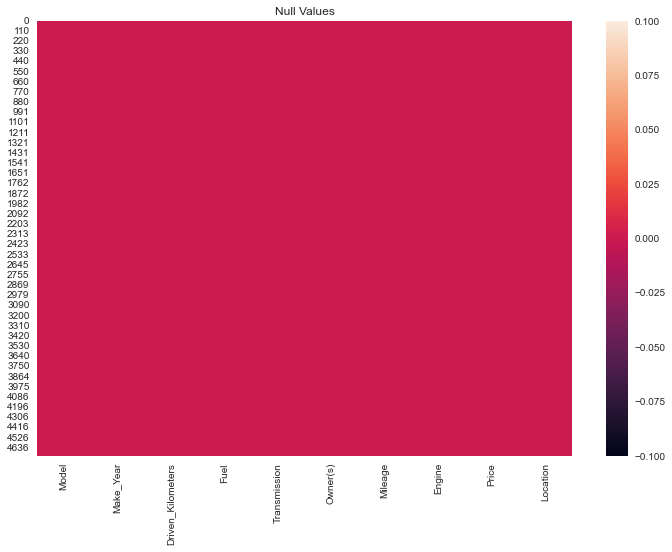

In [93]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [12,8])
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

In [95]:
data.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Transmission,2
Owner(s),4
Fuel,5
Location,12
Make_Year,20
Engine,149
Mileage,450
Price,813
Model,1519
Driven_Kilometers,1754


In [96]:
# Data pre processing

data["Driven_Kilometers"]=data["Driven_Kilometers"].apply(lambda x: x.replace(',','') if x!='-' else '-')
data["Driven_Kilometers"]=data["Driven_Kilometers"].apply(lambda x: int(x.split(' ')[0]) if x!='-' else 0)
data

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,Kia Seltos Htx G,2021,13400,Petrol,Manual,1,16.80,1497,1425000.0,Ahmedabad
1,Tata Harrier Xz Dark Edition Bsiv,2019,36000,Diesel,Manual,1,17.00,1956,1700000.0,Ahmedabad
2,Tata Indica Ev Lx,2012,30645,Diesel,Manual,1,25.00,1396,131000.0,Ahmedabad
3,Jeep Compass . Sport Dct,2022,3000,Petrol,Automatic,1,14.10,1368,1850000.0,Ahmedabad
4,Volkswagen Tiguan Allspace motion,2020,20000,Petrol,Automatic,1,17.01,1984,2950000.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
4717,Hyundai I . Spotz,2017,63851,Petrol,Manual,1,18.60,1197,625000.0,Pune
4718,Hyundai I Sportz At .,2013,52507,Petrol,Automatic,2,15.00,1396,420000.0,Pune
4719,Honda Jazz . Sv I Vtec,2017,32703,Petrol,Manual,2,18.70,1199,565000.0,Pune
4720,Honda City . V Mt Exclusive,2010,33359,Petrol,Manual,1,17.00,1497,375000.0,Pune


In [97]:
data.dtypes

Model                 object
Make_Year              int64
Driven_Kilometers      int64
Fuel                  object
Transmission          object
Owner(s)               int64
Mileage              float64
Engine                object
Price                float64
Location              object
dtype: object

In [101]:
data.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Transmission,2
Owner(s),4
Fuel,5
Location,12
Make_Year,20
Engine,149
Mileage,450
Price,813
Model,1519
Driven_Kilometers,1754


In [106]:
#Let's check the overall metrics of each column


data.describe()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Price
count,4706.000000,4706.000000,4706.000000,4706.000000,4.706000e+03
mean,2015.725669,55514.239907,1.232894,58.881549,1.197412e+06
std,3.356749,41296.767424,0.480158,280.495161,1.343059e+06
min,2003.000000,145.000000,1.000000,0.000000,5.645900e+04
25%,2014.000000,30000.250000,1.000000,15.960000,4.332500e+05
50%,2016.000000,52000.000000,1.000000,18.150000,7.100000e+05
75%,2018.000000,73000.000000,1.000000,20.890000,1.390000e+06
max,2022.000000,970000.000000,4.000000,2995.000000,9.200000e+06


# EDA(Exploratory Data Analysis)


# Univariate Analysis


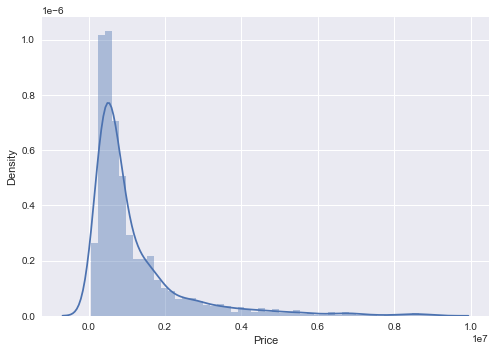

In [107]:
#Let's check the Target column : "Price"

plt.style.use('seaborn')
sns.distplot(data['Price'])
plt.show()

Price column is not normally distributed
we have some of the car prices with a high price than normal

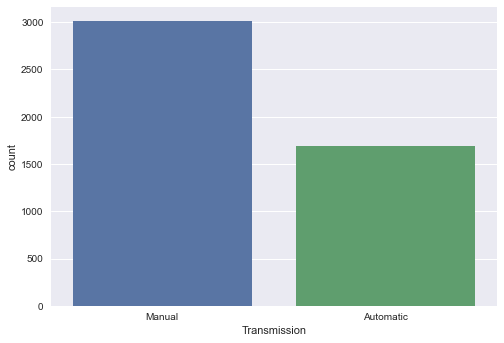

In [108]:
sns.countplot(x = 'Transmission', data = data)
plt.show()

<AxesSubplot:xlabel='Fuel', ylabel='count'>

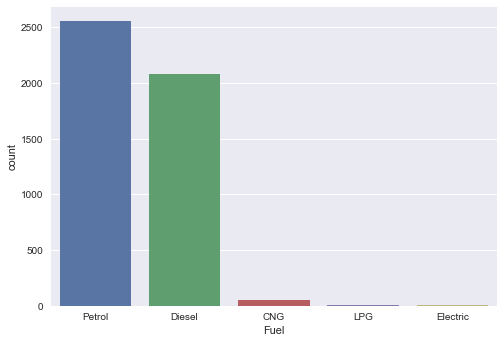

In [109]:
sns.countplot(x = 'Fuel', data = data)

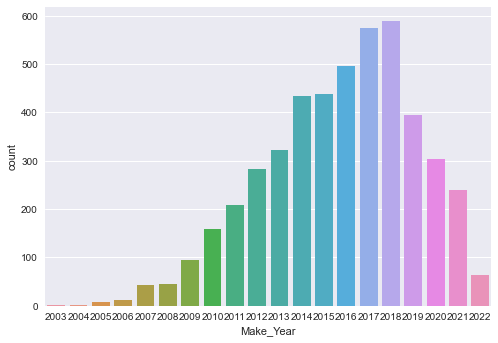

In [110]:
sns.countplot(x = 'Make_Year', data = data)
plt.show()

# Bivariate Analysis


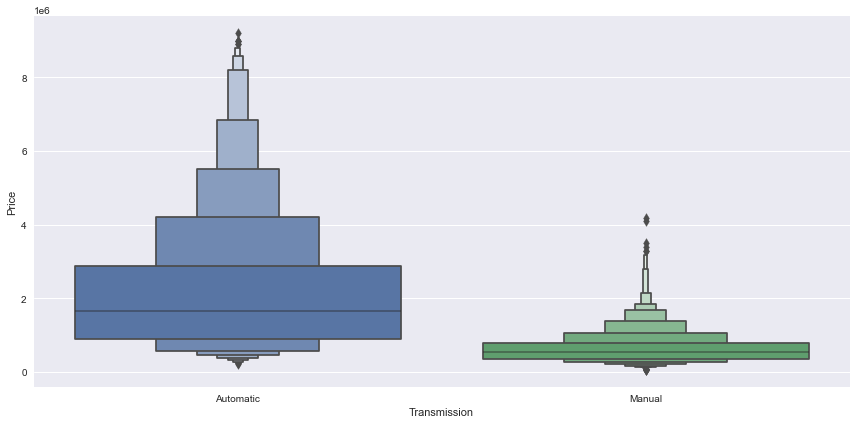

In [111]:

sns.catplot(y = 'Price', x = 'Transmission',data= data.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

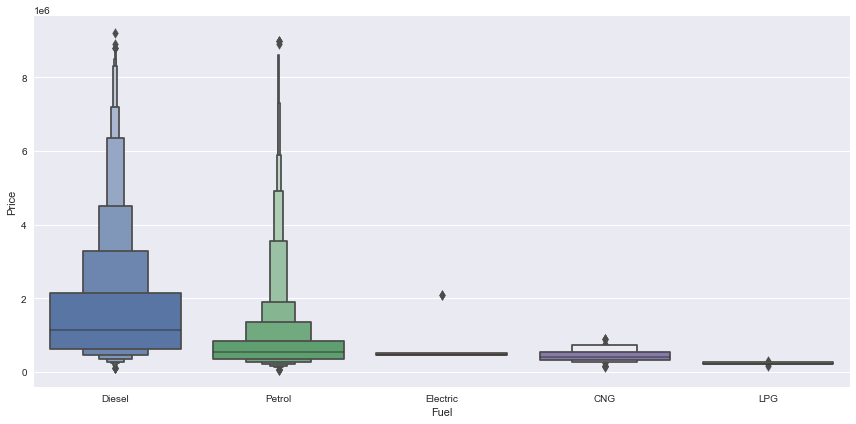

In [112]:
sns.catplot(y = 'Price', x = 'Fuel',data= data.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

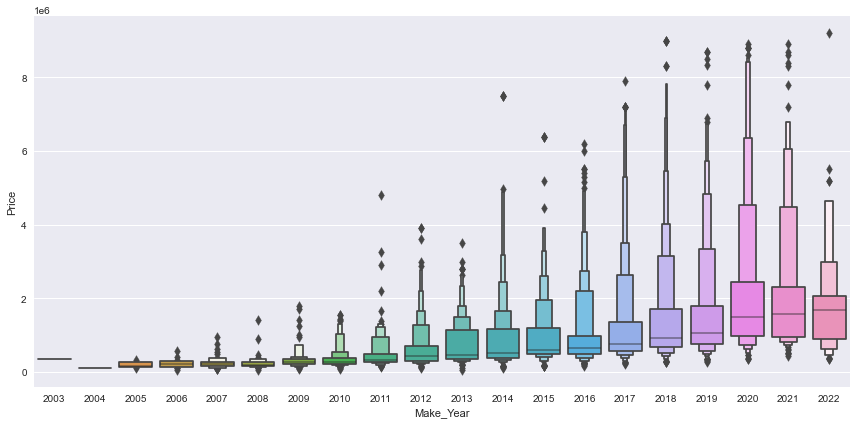

In [113]:
sns.catplot(y = 'Price', x = 'Make_Year',data= data.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

# Multivariate Analysis


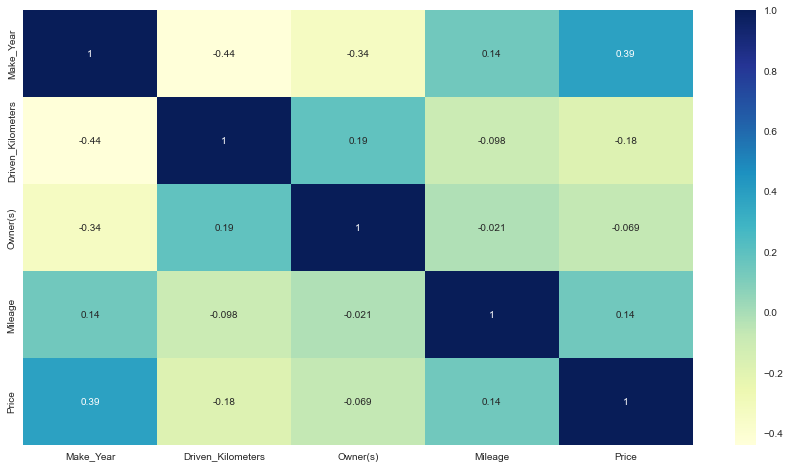

In [114]:
#Let's check the correlation by using the Heatmap (in order to check teh relation between features)

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot = True)
plt.show()

In [115]:
data.corr()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Price
Make_Year,1.000000,-0.440068,-0.336833,0.144730,0.385675
Driven_Kilometers,-0.440068,1.000000,0.185494,-0.098052,-0.184856
Owner(s),-0.336833,0.185494,1.000000,-0.021135,-0.069109
Mileage,0.144730,-0.098052,-0.021135,1.000000,0.141164
Price,0.385675,-0.184856,-0.069109,0.141164,1.000000


# Data PreProcessing


<Figure size 576x396 with 0 Axes>

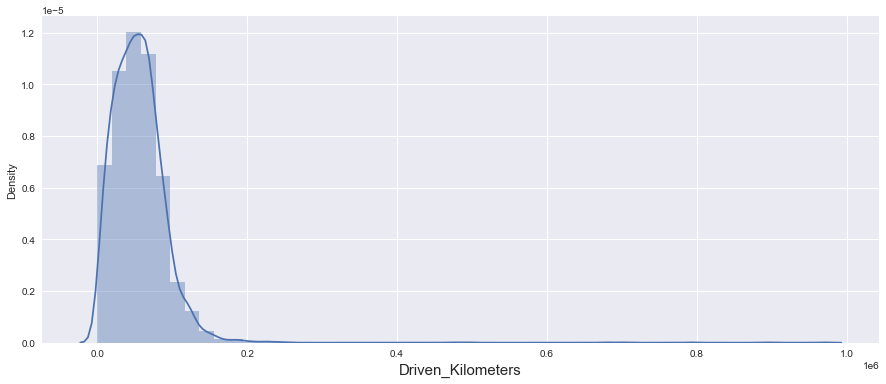

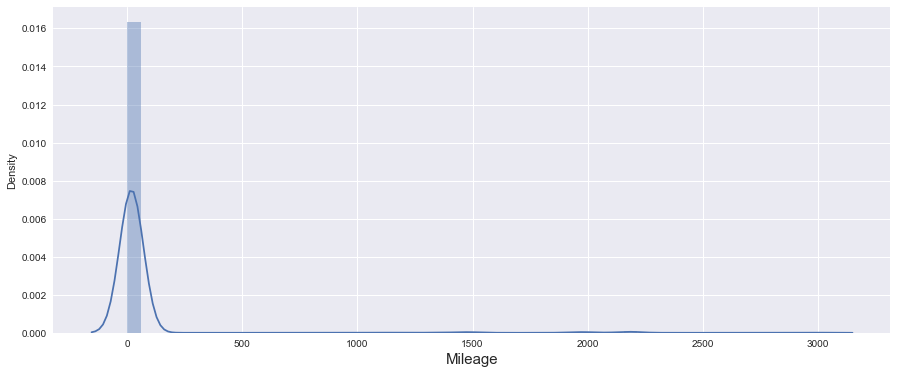

In [117]:
#Normal Distribution plotting

columns = ['Driven_Kilometers', 'Mileage'] #with numerical data

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.distplot(data[i])
    plt.xlabel(i,fontsize=15)
plt.show()

<Figure size 576x396 with 0 Axes>

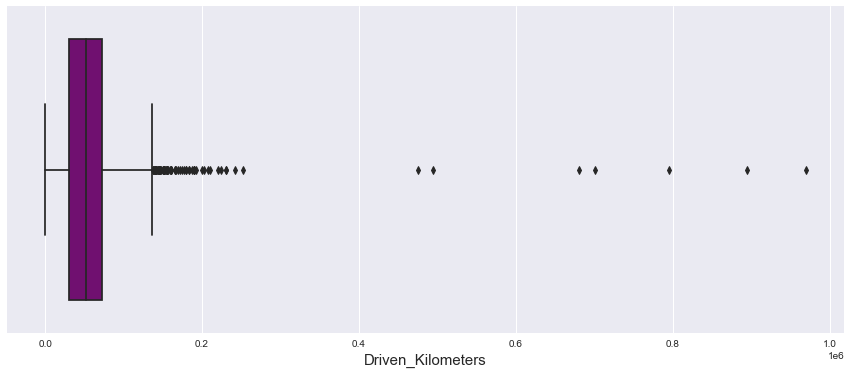

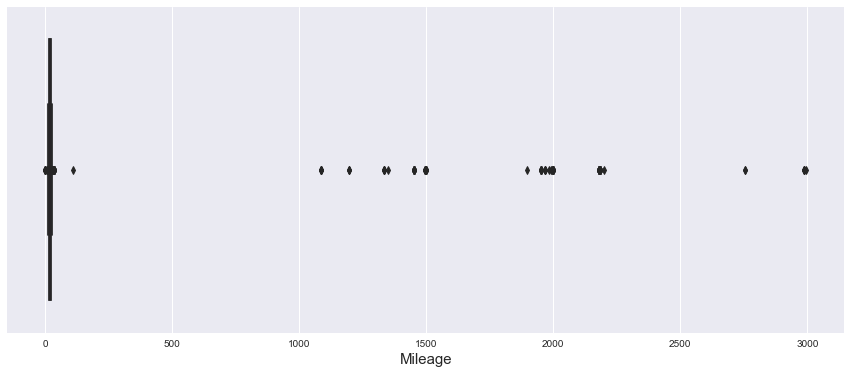

In [119]:
# Using Boxplot to checkthe outliers

columns = ['Driven_Kilometers', 'Mileage']

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.boxplot(data[i],color = 'Purple')
    plt.xlabel(i,fontsize=15)
plt.show()

In [123]:
features = ['Driven_Kilometers', 'Mileage']

# Applying IQR Method


In [124]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [125]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (4706, 10)
Shape After          : (4568, 10)
Percentage Loss      : 2.932426689332767


# Applying z-score Method


In [126]:
from scipy.stats import zscore  #importing zscore from library

z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [127]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (4706, 10)
Shape After          : (4578, 10)
Percentage Loss      : 2.7199320016999575


In [128]:
data_new = data_new1.copy()  #let's copy our new data in another variaible

# Skewness


In [130]:
data.skew()

Make_Year           -0.446291
Driven_Kilometers    7.718390
Owner(s)             2.044945
Mileage              7.149449
Price                2.779204
dtype: float64

In [131]:
#Skewness after applying the outliers technique

data_new.skew()

Make_Year           -0.470312
Driven_Kilometers    0.607592
Owner(s)             2.038422
Mileage              0.430599
Engine               1.191865
Price                2.848018
dtype: float64

In [160]:
data_new=data_new.drop('Engine',axis=1)


In [161]:
data_new['Driven_Kilometers'] = np.sqrt(data_new['Driven_Kilometers'])

In [162]:
data_new.skew()

Make_Year           -0.470312
Driven_Kilometers   -1.066979
Owner(s)             2.038422
Mileage              0.430599
Price                2.848018
dtype: float64

In [163]:
data_new.shape

(4568, 9)

In [164]:
# Create a dataframe that will contain the Brands (by extracting the name from the title of the model column)

df1 = {}
df1 = pd.DataFrame(data_new['Model'].str.split().tolist(), columns="Brand Models A B C D E F G ".split())
df1 = df1.drop(columns=['Models','A','B','C','D','E','F','G'],axis=1)


df1['Index'] = range(4568) 


df1.set_index('Index',inplace=True)#ssigning the index column
df1

,Brand
Index,
0,Kia
1,Tata
2,Tata
3,Jeep
4,Volkswagen
...,...
4563,Hyundai
4564,Hyundai
4565,Honda


In [165]:
data_new['Index'] = range(4568)


data_new.set_index('Index',inplace=True) #assigning the index
data_new

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Price,Location
Index,,,,,,,,,
0,Kia Seltos Htx G,2021,3.280108,Petrol,Manual,1,16.80,1425000.0,Ahmedabad
1,Tata Harrier Xz Dark Edition Bsiv,2019,3.711400,Diesel,Manual,1,17.00,1700000.0,Ahmedabad
2,Tata Indica Ev Lx,2012,3.637433,Diesel,Manual,1,25.00,131000.0,Ahmedabad
3,Jeep Compass . Sport Dct,2022,2.720446,Petrol,Automatic,1,14.10,1850000.0,Ahmedabad
4,Volkswagen Tiguan Allspace motion,2020,3.448488,Petrol,Automatic,1,17.01,2950000.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...
4563,Hyundai I . Spotz,2017,3.986997,Petrol,Manual,1,18.60,625000.0,Pune
4564,Hyundai I Sportz At .,2013,3.890695,Petrol,Automatic,2,15.00,420000.0,Pune
4565,Honda Jazz . Sv I Vtec,2017,3.667106,Petrol,Manual,2,18.70,565000.0,Pune


In [166]:
Used_Cars = pd.concat([data_new, df1], axis=1) #Combine both the datasets

In [167]:
Used_Cars  #Display the extracted dataset

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Price,Location,Brand
Index,,,,,,,,,,
0,Kia Seltos Htx G,2021,3.280108,Petrol,Manual,1,16.80,1425000.0,Ahmedabad,Kia
1,Tata Harrier Xz Dark Edition Bsiv,2019,3.711400,Diesel,Manual,1,17.00,1700000.0,Ahmedabad,Tata
2,Tata Indica Ev Lx,2012,3.637433,Diesel,Manual,1,25.00,131000.0,Ahmedabad,Tata
3,Jeep Compass . Sport Dct,2022,2.720446,Petrol,Automatic,1,14.10,1850000.0,Ahmedabad,Jeep
4,Volkswagen Tiguan Allspace motion,2020,3.448488,Petrol,Automatic,1,17.01,2950000.0,Ahmedabad,Volkswagen
...,...,...,...,...,...,...,...,...,...,...
4563,Hyundai I . Spotz,2017,3.986997,Petrol,Manual,1,18.60,625000.0,Pune,Hyundai
4564,Hyundai I Sportz At .,2013,3.890695,Petrol,Automatic,2,15.00,420000.0,Pune,Hyundai
4565,Honda Jazz . Sv I Vtec,2017,3.667106,Petrol,Manual,2,18.70,565000.0,Pune,Honda


In [168]:
Used_Cars.reset_index('Index',inplace=True) #reset the index

In [169]:
Used_Cars = Used_Cars.drop('Index',axis=1) #remove the extra columns
Used_Cars = Used_Cars.drop('Model',axis=1)

In [170]:
Used_Cars  #Our datset is now ready

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Price,Location,Brand
0,2021,3.280108,Petrol,Manual,1,16.80,1425000.0,Ahmedabad,Kia
1,2019,3.711400,Diesel,Manual,1,17.00,1700000.0,Ahmedabad,Tata
2,2012,3.637433,Diesel,Manual,1,25.00,131000.0,Ahmedabad,Tata
3,2022,2.720446,Petrol,Automatic,1,14.10,1850000.0,Ahmedabad,Jeep
4,2020,3.448488,Petrol,Automatic,1,17.01,2950000.0,Ahmedabad,Volkswagen
...,...,...,...,...,...,...,...,...,...
4563,2017,3.986997,Petrol,Manual,1,18.60,625000.0,Pune,Hyundai
4564,2013,3.890695,Petrol,Automatic,2,15.00,420000.0,Pune,Hyundai
4565,2017,3.667106,Petrol,Manual,2,18.70,565000.0,Pune,Honda
4566,2010,3.676221,Petrol,Manual,1,17.00,375000.0,Pune,Honda


In [171]:
Used_Cars['Brand'].unique()

array(['Kia', 'Tata', 'Jeep', 'Volkswagen', 'Hyundai', 'Honda',
       'Chevrolet', 'Maruti', 'Mercedes-benz', 'Renault', 'Bmw',
       'Mahindra', 'Audi', 'Jaguar', 'Toyota', 'Ford', 'Datsun', 'Volvo',
       'Mg', 'Nissan', 'Land', 'Fiat', 'Skoda', 'Porsche', 'Isuzu',
       'Mini', 'Mitsubishi', 'Lexus', 'Opelcorsa'], dtype=object)

In [172]:
Used_Cars['Brand'].value_counts()

Maruti           910
Hyundai          867
Honda            486
Toyota           280
Mahindra         252
Mercedes-benz    236
Volkswagen       188
Bmw              174
Tata             162
Audi             156
Renault          152
Ford             150
Skoda            119
Kia               78
Jeep              56
Land              47
Volvo             41
Mg                35
Chevrolet         33
Nissan            31
Datsun            22
Jaguar            21
Mini              20
Porsche           17
Fiat              15
Mitsubishi         9
Isuzu              7
Lexus              3
Opelcorsa          1
Name: Brand, dtype: int64

In [173]:
Used_Cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [174]:
Used_Cars['Make_Year'].unique()

array([2021, 2019, 2012, 2022, 2020, 2018, 2016, 2017, 2011, 2014, 2015,
       2013, 2009, 2007, 2008, 2010, 2005, 2006, 2003, 2004], dtype=int64)

In [175]:
#Let's use Label encoder for encoding some of the columns

l1 = ['Transmission','Fuel','Make_Year'] 

#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function

for i in l1:
    Used_Cars[i]= le.fit_transform(Used_Cars[i].values.reshape(-1,1))
Used_Cars.head()

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Price,Location,Brand
0,18,3.280108,4,1,1,16.80,1425000.0,Ahmedabad,Kia
1,16,3.711400,1,1,1,17.00,1700000.0,Ahmedabad,Tata
2,9,3.637433,1,1,1,25.00,131000.0,Ahmedabad,Tata
3,19,2.720446,4,0,1,14.10,1850000.0,Ahmedabad,Jeep
4,17,3.448488,4,0,1,17.01,2950000.0,Ahmedabad,Volkswagen


In [177]:
#Get dummies
l2=pd.get_dummies(Used_Cars['Brand'])

#Concat with main dataframe by dropping workclass dataframe
Used_Cars=pd.concat([Used_Cars.drop('Brand',axis=1),l2],axis=1)
#Get dummies
l3=pd.get_dummies(Used_Cars['Location'])

#Concat with main dataframe by dropping workclass dataframe
Used_Cars=pd.concat([Used_Cars.drop('Location',axis=1),l3],axis=1)
Used_Cars

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Price,Audi,Bmw,Chevrolet,...,Chennai,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,NCR,New Delhi,Noida,Pune
0,18,3.280108,4,1,1,16.80,1425000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,3.711400,1,1,1,17.00,1700000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,3.637433,1,1,1,25.00,131000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,2.720446,4,0,1,14.10,1850000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,3.448488,4,0,1,17.01,2950000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,14,3.986997,4,1,1,18.60,625000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4564,10,3.890695,4,0,2,15.00,420000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4565,14,3.667106,4,1,2,18.70,565000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4566,7,3.676221,4,1,1,17.00,375000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting features and labels


In [178]:
X = Used_Cars.drop(columns = 'Price') #Features
Y = Used_Cars['Price'] #Label

In [179]:
#let's check for our dimensions after splitting the data

print('Features dimension:\t',X.shape,'\nLabel Dimension:\t',Y.shape)

Features dimension:	 (4568, 47) 
Label Dimension:	 (4568,)


In [180]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

# Finding the Best Random State


In [181]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.7599311744665296  with Random State  88


In [182]:
#Let's split our dataset for training and testing purpose

x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y, test_size =0.20, random_state = maxRS)


# Model Building


In [183]:
#Importing all required Libraries that will be used for building a model

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

RandomForestRegressor()
R Squared (R2):  89.88094131140285
Mean Squared Error (MSE):  160715539634.9257
Root Mean Squared Error (RMSE):  400893.42677939445
Mean Absolute Error (MAE):  183436.48027612796


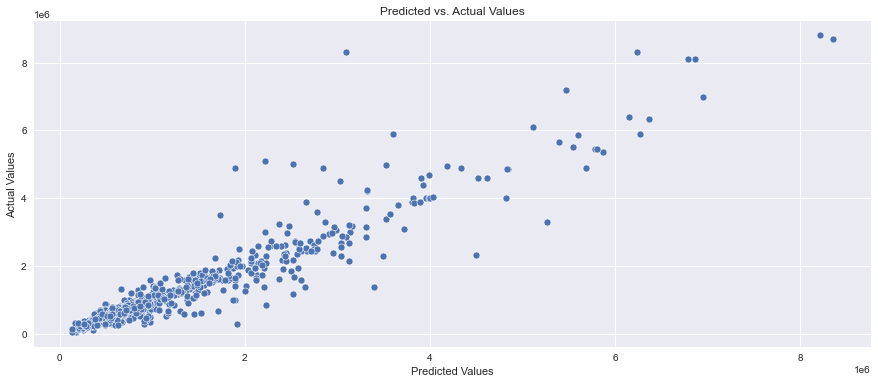

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  76.12863381520887
Mean Squared Error (MSE):  379136006250.74506
Root Mean Squared Error (RMSE):  615740.2100324008
Mean Absolute Error (MAE):  320710.36214442016


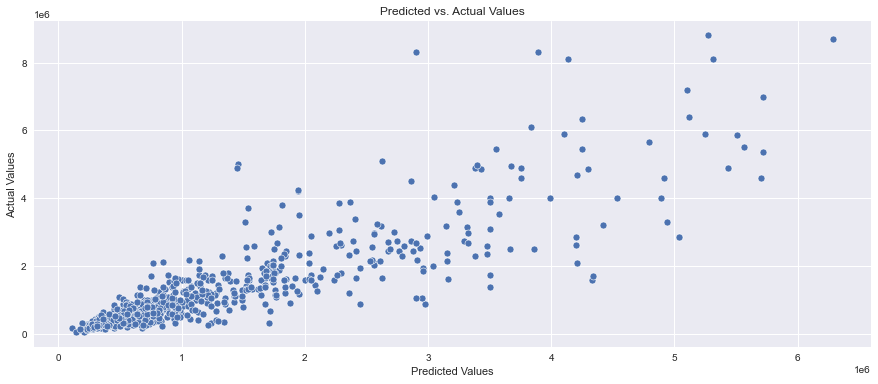

------------------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor()
R Squared (R2):  88.80114797869639
Mean Squared Error (MSE):  177865313492.41595
Root Mean Squared Error (RMSE):  421740.8131689604
Mean Absolute Error (MAE):  247644.03216819413


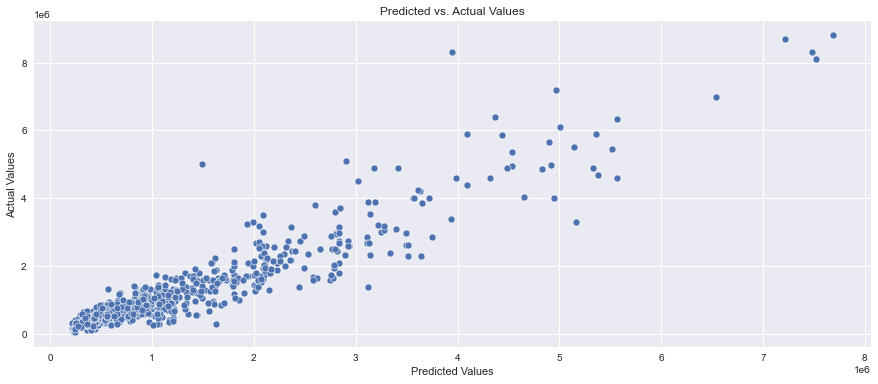

------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(max_features='auto')
R Squared (R2):  80.26338280646169
Mean Squared Error (MSE):  313466022921.8621
Root Mean Squared Error (RMSE):  559880.3648297215
Mean Absolute Error (MAE):  210438.15317286653


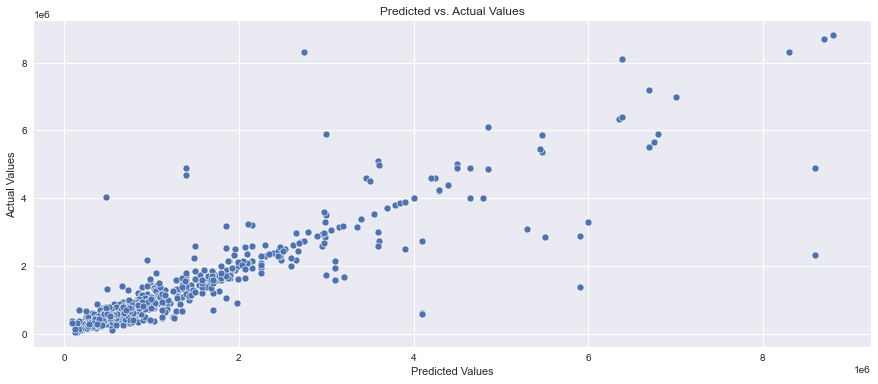

------------------------------------------------------------------------------------------------------------------------
Lasso()
R Squared (R2):  76.14833916475308
Mean Squared Error (MSE):  378823036834.9968
Root Mean Squared Error (RMSE):  615486.0167664224
Mean Absolute Error (MAE):  378213.68916108995


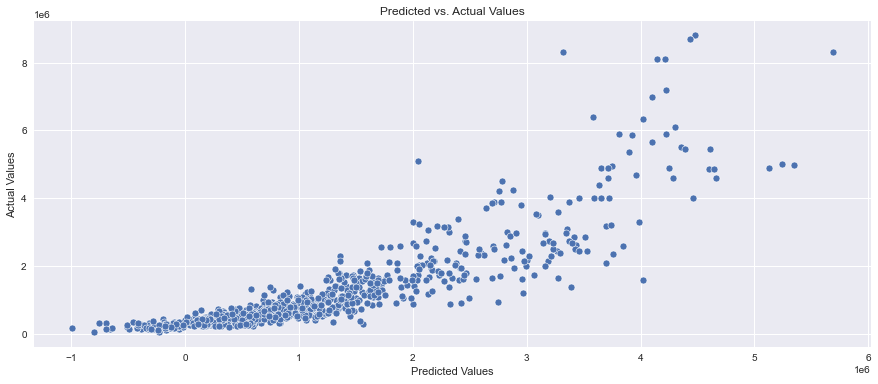

------------------------------------------------------------------------------------------------------------------------
Ridge()
R Squared (R2):  76.14886357065916
Mean Squared Error (MSE):  378814707979.44037
Root Mean Squared Error (RMSE):  615479.2506489884
Mean Absolute Error (MAE):  378135.0710186928


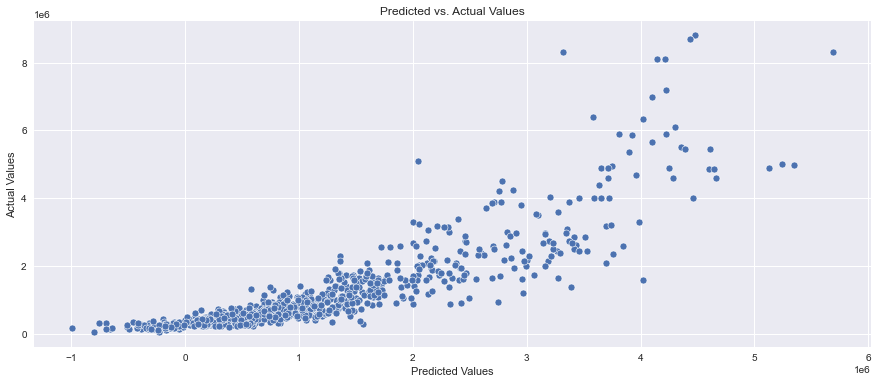

------------------------------------------------------------------------------------------------------------------------


In [184]:
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
gb=GradientBoostingRegressor()
dt = DecisionTreeRegressor(max_features='auto')
ls=Lasso()
rd=Ridge()

model=[rf,kn,gb,dt,ls,rd]
kf = KFold(n_splits=5, random_state=43, shuffle=True)

train=[]
test=[]
cv=[]
for m in model:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    print(m)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,pred_test))
    score=cross_val_score(m,X_scaled,Y,cv=kf)
    cv.append(score.mean()*100)
    plt.figure(figsize=[15,6])
    sns.scatterplot(x=pred_test, y=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    Overall_score={'Model':['RandomForest','KNN','GradientBoosting','DecisionTree Regressor','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)

In [187]:
#Let's save our model for future predictions

import joblib

joblib.dump(rf,'Used_Car_Price_Prediction.obj')

['Used_Car_Price_Prediction.obj']